In [1]:
import numpy as np
import pandas as pd

In [2]:
# Correct function to read a CSV file
t1 = pd.read_csv("C:\\Users\\R S SUNEEL KRISHNA\\Downloads\\Assignment_fuel\\Assignment_fuel\\telemetry_1.csv")

# Display the first few rows of the DataFrame
print(t1.head())

   vehicle_id                         timestamp  speed  odometer  fuel_level
0   vehicle_4         2024-06-06 14:26:23-07:00   64.2       NaN         NaN
1   vehicle_8  2024-07-05 22:24:12.856000-07:00    1.6   12048.0         NaN
2   vehicle_3  2024-06-20 12:57:59.306000-07:00    NaN       NaN        45.0
3  vehicle_10  2024-07-24 18:04:23.776000-07:00   36.2    1434.7         NaN
4  vehicle_11         2024-07-06 11:08:03-07:00   29.5       NaN         NaN


In [3]:
# Correct function to read a CSV file
t2 = pd.read_csv("C:\\Users\\R S SUNEEL KRISHNA\\OneDrive\\Documents\\telemetry_2_1.csv")
print(t2.head())

   vehicle_id                         timestamp   val   name
0   vehicle_4         2024-07-23 19:56:44-05:30   0.0  speed
1  vehicle_11         2024-04-04 22:33:56-05:30  52.7  speed
2   vehicle_3  2024-07-18 23:30:04.027000-05:30   5.8  speed
3   vehicle_3  2024-05-22 00:49:49.402000-05:30  34.4  speed
4  vehicle_10  2024-07-16 05:48:11.710000-05:30  42.8  speed


In [4]:
t3 = pd.read_csv("C:\\Users\\R S SUNEEL KRISHNA\\OneDrive\\Desktop\\MOTORQ\\Assignment_fuel\\vehicle_data.csv")
print(t3.head())

          id datasource  tank_capacity  rated_mpg
0  vehicle_1   source_1           18.0         35
1  vehicle_2   source_1           15.8         32
2  vehicle_3   source_2           15.8         24
3  vehicle_4   source_1           13.0         32
4  vehicle_5   source_2           23.0         22


In [5]:
t2_pivot = t2.pivot_table(index=['vehicle_id', 'timestamp'], columns='name', values='val').reset_index()

In [6]:
merged_data = pd.merge(t1, t2_pivot, on=['vehicle_id', 'timestamp'], how='outer')

In [7]:
merged_data['speed'] = merged_data['speed_x'].combine_first(merged_data['speed_y'])
merged_data['odometer'] = merged_data['odometer_x'].combine_first(merged_data['odometer_y'])
merged_data['fuel_level'] = merged_data['fuel_level_x'].combine_first(merged_data['fuel_level_y'])

# Drop the unnecessary columns
merged_data = merged_data.drop(columns=['speed_x', 'speed_y', 'odometer_x', 'odometer_y', 'fuel_level_x', 'fuel_level_y'])

In [8]:
merged_data

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,NaN,NaN
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,NaN,NaN,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,NaN,NaN
...,...,...,...,...,...
681102,vehicle_9,2024-08-01 02:59:56-05:30,26.7,NaN,NaN
681103,vehicle_9,2024-08-01 05:25:10-05:30,NaN,6281.0,56.0
681104,vehicle_9,2024-08-01 05:25:26-05:30,18.8,NaN,NaN
681105,vehicle_9,2024-08-01 05:26:10-05:30,NaN,6281.0,56.0


C:\Users\R S SUNEEL KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\R S SUNEEL KRISHNA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


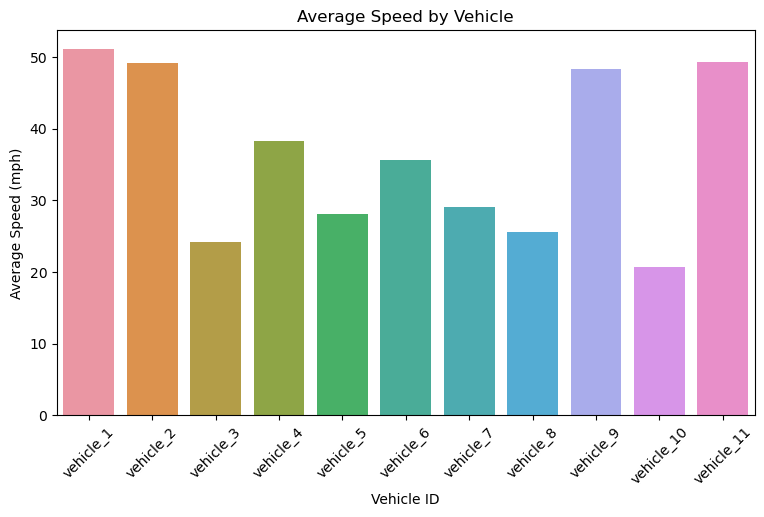

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_order = ['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4','vehicle_5','vehicle_6','vehicle_7','vehicle_8','vehicle_9','vehicle_10','vehicle_11']
avg_speed = merged_data.groupby('vehicle_id')['speed'].mean().reset_index()

# Convert 'vehicle_id' to a categorical type with a specific order
avg_speed['vehicle_id'] = pd.Categorical(avg_speed['vehicle_id'], categories=custom_order, ordered=True)

# Plot average speed by vehicle
plt.figure(figsize=(9,5))
sns.barplot(x='vehicle_id', y='speed', data=avg_speed)
plt.xlabel('Vehicle ID')
plt.ylabel('Average Speed (mph)')
plt.title('Average Speed by Vehicle')
plt.xticks(rotation=45)
plt.show()

C:\Users\R S SUNEEL KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\R S SUNEEL KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


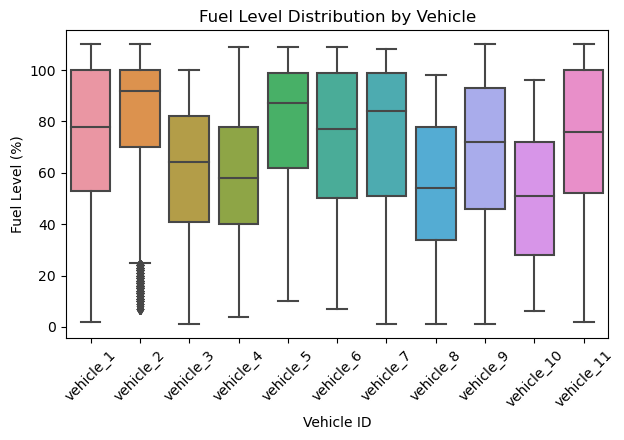

In [10]:
# Define custom order based on numeric parts
custom_order = ['vehicle_1', 'vehicle_2', 'vehicle_3', 'vehicle_4','vehicle_5','vehicle_6','vehicle_7','vehicle_8','vehicle_9','vehicle_10','vehicle_11']

# Plot fuel level distribution by vehicle with custom x-axis order
plt.figure(figsize=(7,4))
sns.boxplot(x='vehicle_id', y='fuel_level', data=merged_data, order=custom_order)
plt.xlabel('Vehicle ID')
plt.ylabel('Fuel Level (%)')
plt.title('Fuel Level Distribution by Vehicle')
plt.xticks(rotation=45)
plt.show()

In [11]:
avg_speed = merged_data.groupby('vehicle_id')['speed'].mean()
avg_fuel_usage = merged_data.groupby('vehicle_id')['fuel_level'].mean()
print(avg_speed, avg_fuel_usage)


vehicle_id
vehicle_1     51.200992
vehicle_10    20.650007
vehicle_11    49.291930
vehicle_2     49.143277
vehicle_3     24.223079
vehicle_4     38.262947
vehicle_5     28.042438
vehicle_6     35.592375
vehicle_7     29.127092
vehicle_8     25.627972
vehicle_9     48.374046
Name: speed, dtype: float64 vehicle_id
vehicle_1     73.249617
vehicle_10    51.206423
vehicle_11    72.219993
vehicle_2     81.415304
vehicle_3     61.275827
vehicle_4     60.045616
vehicle_5     78.324221
vehicle_6     73.045283
vehicle_7     73.793058
vehicle_8     55.134314
vehicle_9     67.082885
Name: fuel_level, dtype: float64


In [12]:
merged_data=merged_data.fillna(0)

In [13]:
# Calculate distance traveled
# Calculate distance as the absolute difference between odometer readings
merged_data['distance'] = merged_data['odometer'].diff().abs()

# Calculate fuel consumed as the absolute difference between fuel levels
merged_data['fuel_consumed'] = merged_data['fuel_level'].diff().abs()


# Check for negative or zero values
print(merged_data[merged_data['distance'] < 0])
print(merged_data[merged_data['fuel_consumed'] <= 0])


Empty DataFrame
Columns: [vehicle_id, timestamp, speed, odometer, fuel_level, distance, fuel_consumed]
Index: []
        vehicle_id                         timestamp  speed  odometer  \
1        vehicle_8  2024-07-05 22:24:12.856000-07:00    1.6   12048.0   
4       vehicle_11         2024-07-06 11:08:03-07:00   29.5       0.0   
5        vehicle_5  2024-07-03 06:27:43.287000-07:00   79.8    2689.9   
6        vehicle_3  2024-05-24 23:41:56.754000-07:00    0.0     815.9   
7        vehicle_5  2024-07-25 10:05:23.786000-07:00    2.3    4334.7   
...            ...                               ...    ...       ...   
681090   vehicle_9         2024-08-01 01:49:42-05:30    0.0       0.0   
681093   vehicle_9         2024-08-01 01:51:42-05:30    0.0       0.0   
681094   vehicle_9         2024-08-01 01:53:42-05:30    0.0       0.0   
681096   vehicle_9         2024-08-01 01:56:36-05:30    0.0    6280.0   
681099   vehicle_9         2024-08-01 02:02:46-05:30    0.0    6280.0   

        fu

In [14]:
merged_data['fuel_economy'] = merged_data['distance'] / merged_data['fuel_consumed'].replace(0, np.nan)


In [15]:
fuel_economy_by_vehicle = merged_data.groupby('vehicle_id')['fuel_economy'].mean().reset_index()
fuel_economy_by_vehicle

,vehicle_id,fuel_economy
0,vehicle_1,158.021199
1,vehicle_10,70.185868
2,vehicle_11,250.562939
3,vehicle_2,150.304864
4,vehicle_3,87.736756
5,vehicle_4,138.987118
6,vehicle_5,59.048766
7,vehicle_6,71.503398
8,vehicle_7,122.965442
9,vehicle_8,224.687308


In [16]:
# Identify anomalies where distance is 0 but fuel is consumed
anomalies = merged_data[(merged_data['distance'] == 0) & (merged_data['fuel_consumed'] > 0)]

# Remove these anomalies from the dataset
merged_data_cleaned = merged_data.drop(anomalies.index)

# Recalculate the fuel economy for each vehicle
fuel_economy_by_vehicle = merged_data_cleaned[merged_data_cleaned['fuel_economy'] > 0].groupby('vehicle_id')['fuel_economy'].mean().reset_index()

# Display the cleaned fuel economy data
print(fuel_economy_by_vehicle)

    vehicle_id  fuel_economy
0    vehicle_1    260.935215
1   vehicle_10     82.058317
2   vehicle_11    414.301879
3    vehicle_2    250.004867
4    vehicle_3     96.301680
5    vehicle_4    173.793243
6    vehicle_5     64.969516
7    vehicle_6     78.276064
8    vehicle_7    135.266623
9    vehicle_8    249.108428
10   vehicle_9    166.057464


In [17]:
merged_data_cleaned = merged_data[merged_data['fuel_economy'] >= 0]

C:\Users\R S SUNEEL KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\R S SUNEEL KRISHNA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


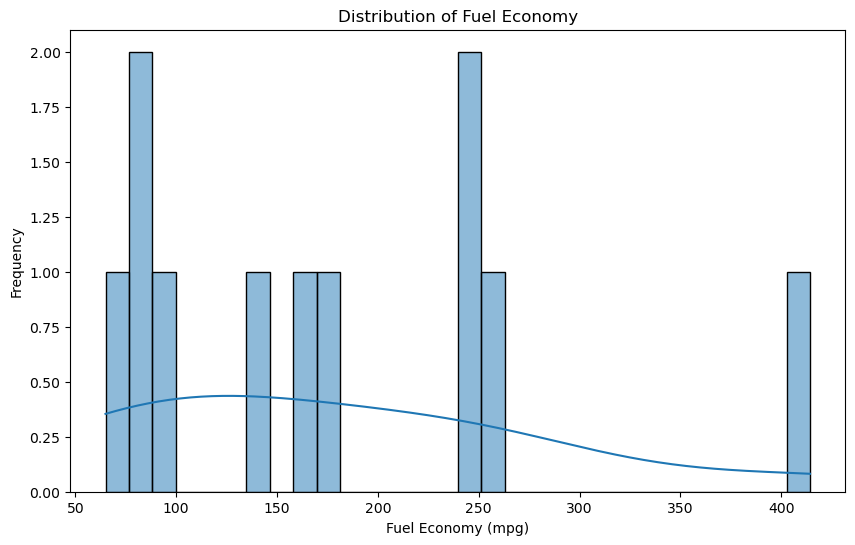

In [18]:
# Plot distribution of fuel economy
plt.figure(figsize=(10, 6))
sns.histplot(fuel_economy_by_vehicle['fuel_economy'], bins=30, kde=True)
plt.xlabel('Fuel Economy (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Economy')
plt.show()


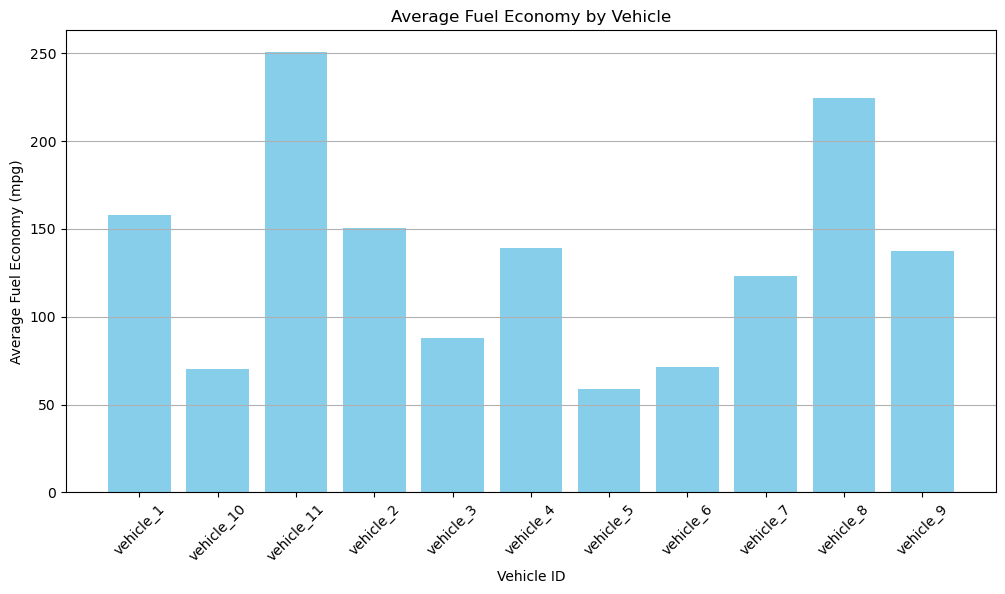

In [19]:
import matplotlib.pyplot as plt

# Assuming 'fuel_economy_by_vehicle' is already calculated
fuel_economy_by_vehicle = merged_data.groupby('vehicle_id')['fuel_economy'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Create the bar plot
plt.bar(fuel_economy_by_vehicle['vehicle_id'], fuel_economy_by_vehicle['fuel_economy'], color='skyblue')

plt.xlabel('Vehicle ID')
plt.ylabel('Average Fuel Economy (mpg)')
plt.title('Average Fuel Economy by Vehicle')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


In [20]:
# Ensure fuel_economy is present in the DataFrame
# First, make sure there are no NaN values affecting the correlation
merged_data_cleaned = merged_data_cleaned.dropna(subset=['fuel_economy', 'speed', 'odometer', 'fuel_level'])

# Calculate correlation matrix
correlation_matrix = merged_data_cleaned[['fuel_economy', 'speed', 'odometer', 'fuel_level']].corr()

# Display the correlation matrix
print(correlation_matrix)


              fuel_economy     speed  odometer  fuel_level
fuel_economy      1.000000 -0.048467  0.172186   -0.021135
speed            -0.048467  1.000000 -0.031479   -0.434606
odometer          0.172186 -0.031479  1.000000   -0.325674
fuel_level       -0.021135 -0.434606 -0.325674    1.000000


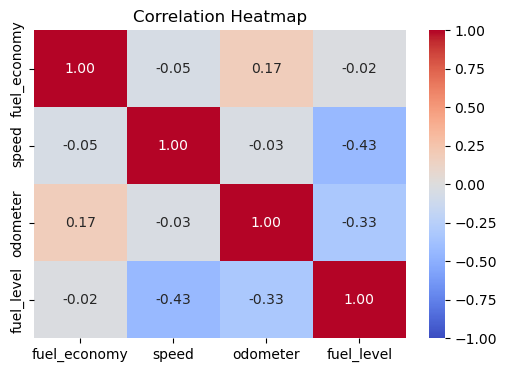

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
